![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/taller_3/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos.
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [1]:
# Cargamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Cargamos los datos de la base artist y user_artist
artist = pd.read_csv('https://raw.githubusercontent.com/sebastian23escobar/Aprendizaje_no_supervisado/refs/heads/main/Taller3/data/artists.dat', sep='\t')
artist.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [3]:
user_artist = pd.read_csv('https://raw.githubusercontent.com/sebastian23escobar/Aprendizaje_no_supervisado/refs/heads/main/Taller3/data/user_artists.dat', sep='\t')
user_artist.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [4]:
# Modificamos la base de datos para preservar solo las columnas id y name
artist = artist[['id', 'name']]

In [5]:
df = pd.merge(user_artist, artist, left_on='artistID', right_on='id', how='inner')
df = df[['userID', 'artistID',  'weight', "name"]]
df.columns = ['userID', 'artistID', 'nro_reproducciones', 'name'] 
df

,userID,artistID,nro_reproducciones,name
0,2,51,13883,Duran Duran
1,2,52,11690,Morcheeba
2,2,53,11351,Air
3,2,54,10300,Hooverphonic
4,2,55,8983,Kylie Minogue
...,...,...,...,...
92829,2100,18726,337,Nyktalgia
92830,2100,18727,297,Atsakau niekadA
92831,2100,18728,281,Domantas Razauskas
92832,2100,18729,280,Atalyja


Se cargaron las bases de datos, se seleccionaron las columnas de interes y luego se realizó un merge para unir las bases de datos quedando un dataframe con los datos de los id de usuarios y el nro de reproducciones de los artistas.

### 2. Análisis preliminar.

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [6]:
nusuarios = df['userID'].nunique()
nartistas = df['artistID'].nunique()
print('Hay', nusuarios, 'usuarios y', nartistas, 'artistas')

Hay 1892 usuarios y 17632 artistas


Hay 1892 usuarios y 17632 artistas


#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [7]:
# Hacemos el cálculo de la probabilidad del consumo por artista sin ponderar, es decir, en función de si un usuario escucho un artista pero sin tener en cuenta la cantidad de reproducciones.
frecuenciasartista = df['name'].value_counts()
distribucionartista = frecuenciasartista / frecuenciasartista.sum()

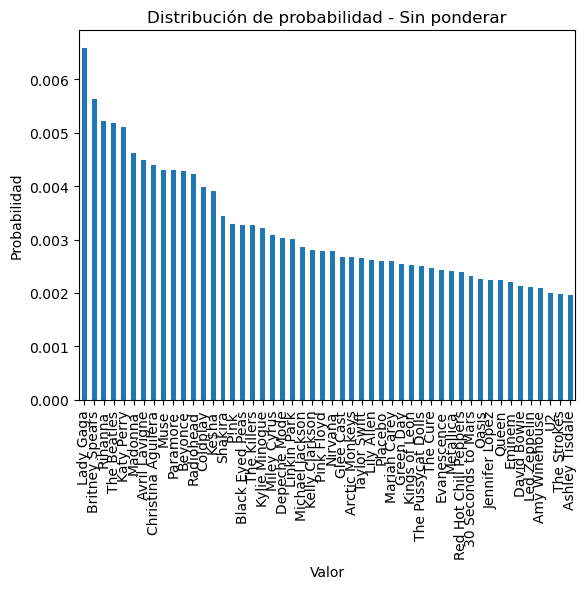

In [8]:
# Filtramos los primeros 50 artistas para poder visualizar mejor.
top_artistas = distribucionartista.nlargest(50)

top_artistas.plot(kind='bar')
plt.ylabel('Probabilidad')
plt.xlabel('Valor')
plt.title('Distribución de probabilidad - Sin ponderar')
plt.show()

### Ponderado por el numero de reproducciones

In [9]:
# Hacemos el cálculo de la probabilidad del consumo por artista sin ponderar, es decir, en función de si un usuario escucho un artista pero sin tener en cuenta la cantidad de reproducciones.
frecuenciasartistapond = df.groupby('name')['nro_reproducciones'].sum()
distribucionartistapond = frecuenciasartistapond / frecuenciasartistapond.sum()

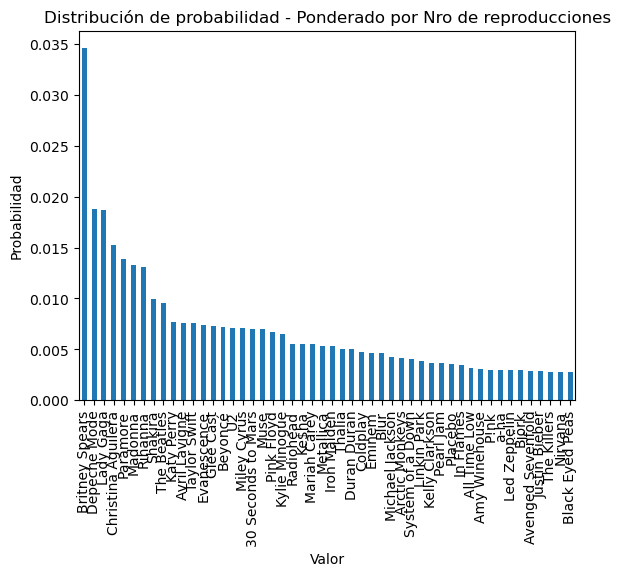

In [10]:
# Filtramos los primeros 50 artistas para poder visualizar mejor, con poderación.
top_artistapond = distribucionartistapond.nlargest(50)

top_artistapond.plot(kind='bar')
plt.ylabel('Probabilidad')
plt.xlabel('Valor')
plt.title('Distribución de probabilidad - Ponderado por Nro de reproducciones')
plt.show()

Se hizo el calculo de la probabilidad de consumo de los artistas, sin ponderación, es decir, solo teniendo en cuenta los usuarios que escucharon al artista al menos una vez, y con ponderación, es decir, teniendo en cuenta las veces que el artista fue reproducido por cada usuario. Como podemos apreciar en las gráficas de barras, ponderar si tienen un efecto sobre las probabilidades de consumo, por ejemplo, sin ponderar, Lady Gaga tiene una probabilidad de consumo superior al de Britney Spears (superior por poco, cerca de 0.001), sin embargo, teniendo en cuenta el nro de reproducciones, Britney Spear es la artista más escuchada aventajando notoriamente a Lady Gaga (superior por cerca de 0.016), de hecho, es Depeche Mode el segundo artista con mayor probabilidad de consumo.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


C:\Users\ypalacios\AppData\Local\Temp\ipykernel_5316\1268917364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user8['pondrel'] = user8['nro_reproducciones'] / user8['nro_reproducciones'].sum()


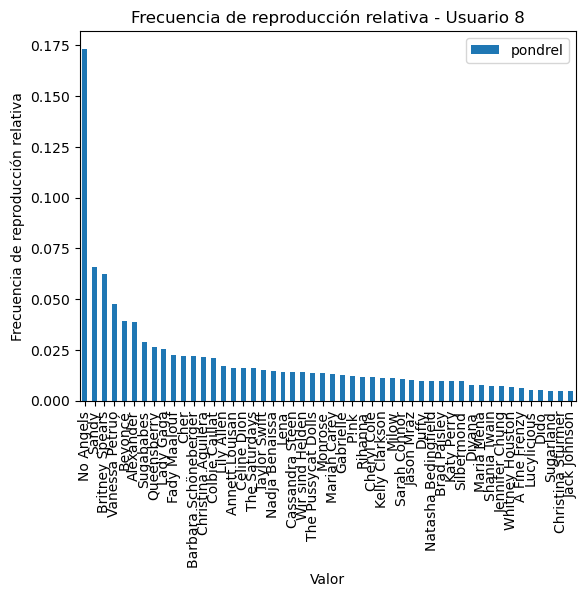

In [11]:
# Hacemos el cálculo de la probabilidad del consumo por artista sin ponderar, es decir, en función de si un usuario escucho un artista pero sin tener en cuenta la cantidad de reproducciones.
user8 = df[df['userID'] == 8]
user8['pondrel'] = user8['nro_reproducciones'] / user8['nro_reproducciones'].sum()
user8 = user8[['name', 'pondrel']]
user8 = user8.sort_values(by='pondrel', ascending=False)
user8 = user8.set_index('name')

user8.plot(kind='bar')
plt.ylabel('Frecuencia de reproducción relativa')
plt.xlabel('Valor')
plt.title('Frecuencia de reproducción relativa - Usuario 8')
plt.show()

In [12]:
user8.head(10)

,pondrel
name,
No Angels,0.173406
Sandy,0.066044
Britney Spears,0.062240
Vanessa Petruo,0.047824
Beyoncé,0.039279
Alexander,0.038783
Sugababes,0.028639
Queensberry,0.026544
Lady Gaga,0.025387


Como podemos apreciar en el gráfico de frecuencia anterior, los artistas más escuchados por el usuario 8 son artistas femeninos de música pop; sin embargo, en los menos escuchados tambien aparecen astistas pop pero mezclados con rock, country y folk.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [13]:
# Contamos el número de usuarios que hay en la base
nusuarios = df['userID'].nunique()
nusuarios

1892

In [14]:
# Contamos la cantidad de usuarios que escuchan cada artista
fcol_ps = df.groupby('name')['nro_reproducciones'].count()
fcol_ps = fcol_ps / nusuarios
fcol_ps = fcol_ps.sort_values(ascending=False)
fcol_ps

name
Lady Gaga                             0.322939
Britney Spears                        0.275899
Rihanna                               0.255814
The Beatles                           0.253700
Katy Perry                            0.250000
                                        ...   
...And The Earth Swarmed With Them    0.000529
06 Children Of The Cross              0.000529
08001                                 0.000529
1-800-ZOMBIE                          0.000529
10-20 БЕЗ ВЫХОДНЫХ                    0.000529
Name: nro_reproducciones, Length: 17632, dtype: float64

In [15]:
# Ahora eliminamos del listado los artistas que escucha el usuario 8
fcol_ps = fcol_ps[~fcol_ps.index.isin(user8.index)]

# Listamos el top 10 de recomendados
fcol_ps.head(10)

name
The Beatles      0.253700
Madonna          0.226744
Avril Lavigne    0.220402
Muse             0.211416
Paramore         0.210888
Radiohead        0.207717
Coldplay         0.195032
Ke$ha            0.191332
Shakira          0.168605
The Killers      0.160677
Name: nro_reproducciones, dtype: float64

Como se observa en el código, se hizo el conteo de los usuarios que escuchan cada artista, y finalmente se dividió por el total de usuarios para hacer el promedio simple de los usuarios que escuchan cada artista, debido a que se desea recomendar nuevos artistas, de la lista se excluyeron los artistas ya escuchados por el usuario 8, como se puede apreciar en la tabla, los artistas recomendados son: The Beatles, Madonna, Avril Lavigne, Muse, Paramore, Radiohead, Coldplay, Ke$ha, Shakira y The killers. Notaremos que si bien es una recomenadación de los artistas más populares, no son todos justamente los más parecidos a los artistas escuchados habitualmente por el usuario 8 (hay artistas de Rock cuando el usuario prefiere pop).

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [16]:
# Primero sumamos las nro_reproducciones de cada artista
fcol_pp = df.groupby('name')['nro_reproducciones'].sum()

In [17]:
# Sumamos el total de nro_reproducciones (el valor no el conteo) para toda la base
den_pond = fcol_pp.sum()
den_pond

np.int64(69183975)

In [18]:
# Hacemos el promedio ponderado de los artistas
fcol_pp = fcol_pp / den_pond
fcol_pp = fcol_pp.sort_values(ascending=False)
fcol_pp

name
Britney Spears        3.459096e-02
Depeche Mode          1.880938e-02
Lady Gaga             1.866598e-02
Christina Aguilera    1.529841e-02
Paramore              1.392590e-02
                          ...     
Ayn Rand              1.445421e-08
Don Julian            1.445421e-08
Tutu Jones            1.445421e-08
Doug Hammond          1.445421e-08
(Pre) Kingdom         1.445421e-08
Name: nro_reproducciones, Length: 17632, dtype: float64

In [19]:
# Ahora eliminamos del listado los artistas que escucha el usuario 8
fcol_pp = fcol_pp[~fcol_pp.index.isin(user8.index)]

# Listamos el top 10 de recomendados
fcol_pp.head(10)

name
Depeche Mode     0.018809
Paramore         0.013926
Madonna          0.013315
Shakira          0.009952
The Beatles      0.009570
Avril Lavigne    0.007601
Evanescence      0.007422
Glee Cast        0.007320
U2               0.007126
Miley Cyrus      0.007069
Name: nro_reproducciones, dtype: float64

Como se observa en el código, se hizo la suma del número de reproducciones que hicieron los usuarios de cada artista, y finalmente se dividió por el total de reproducciones hechas para todos los usuarios, esto para hacer el promedio ponderado de las reproducciones hechas a los artistas; debido a que se desea recomendar nuevos artistas, de la lista se excluyeron los artistas ya escuchados por el usuario 8, como se puede apreciar en la tabla, los artistas recomendados son: Depeche Mode, Paramore, Madonna, Shakira, The Beatles, Avril Lavigne, Evanescense, Glee Cast, U2 y Miley Cirus. Notemos que al igual que las recomendaciones con promedio simple, la recomenadación es de los artistas más populares y por lo tanto no son  justamente los más parecidos a los artistas escuchados habitualmente por el usuario 8 (hay artistas de Rock cuando el usuario prefiere pop). Igualmente es una recomendación de popularidad que de preferencia.

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [20]:
# Primero creamos la matriz de preferencias y reemplazamos los NA por 0
r_matrix = df.pivot_table(values='nro_reproducciones', index='userID', columns='name')
r_matrix_dummy = r_matrix.copy().fillna(0)

In [21]:
# Cargamos cosine_similarity para crear la matriz de distancias
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la similitud de coseno
cosine_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)

# Transformamos la matriz de similitud en un DataFrame
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix.index, columns=r_matrix.index)
cosine_sim.round(4)

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
userID,,,,,,,,,,,,,,,,,,,,,
2,1.0000,0.0000,0.1448,0.0287,0.0070,0.0302,0.0090,0.000,0.0000,0.0213,...,0.0000,0.0434,0.0000,0.0046,0.0016,0.0000,0.0010,0.0821,0.0000,0.0000
3,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,0.0000
4,0.1448,0.0000,1.0000,0.0812,0.0066,0.0000,0.0000,0.000,0.0091,0.0134,...,0.0000,0.0000,0.0038,0.0062,0.0000,0.0000,0.0451,0.6591,0.0000,0.0000
5,0.0287,0.0000,0.0812,1.0000,0.0000,0.0000,0.0000,0.000,0.1691,0.0046,...,0.0110,0.0000,0.2051,0.0000,0.0000,0.0000,0.2046,0.1191,0.0000,0.0000
6,0.0070,0.0000,0.0066,0.0000,1.0000,0.0127,0.0189,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0679
2096,0.0010,0.0000,0.0451,0.2046,0.0000,0.0000,0.0000,0.000,0.0579,0.0018,...,0.0067,0.0000,0.0563,0.0059,0.0000,0.0000,1.0000,0.0308,0.0000,0.0000
2097,0.0821,0.0000,0.6591,0.1191,0.0000,0.0000,0.0000,0.000,0.1107,0.0000,...,0.0045,0.0227,0.2864,0.0000,0.0000,0.0000,0.0308,1.0000,0.0000,0.0000


In [22]:
# Vemos el vector de similitudes para el usuario 8
sim_scores = cosine_sim[8]
sim_scores.head(10)

userID
2     0.008964
3     0.000000
4     0.000000
5     0.000000
6     0.018881
7     0.167416
8     1.000000
9     0.000000
10    0.000000
11    0.187304
Name: 8, dtype: float64

In [23]:
# Definimos una función para calcular el promedio ponderado de los ratings para el usuario 8
# Esta función se creó dedidcada para el usuario 8, es decir, solo funciona para él

def cf_user_wmean(artista_in):

    # Primero verificamos si el artista está en la matriz
    if artista_in in r_matrix:

        #Nuestra función está dedicada al usuario 8, así que el vector sim_scores siempre corresponderá a las medidas de similitud de todos los usuarios con el usuario 8.
        sim_scores = cosine_sim[8]
        sim_scores2 = sim_scores
        # Obtenemos los ratings no faltantes de la matriz bajo evaluación
        m_ratings = r_matrix[artista_in]

         # Obtenemos los índices de los artistas sin rating
        idx = m_ratings[m_ratings.isnull()].index

        # Nos quedamos con similitudes y ratings completos
        sim_scores = sim_scores.drop(idx)
        m_ratings = m_ratings.dropna()

        # Calculamos la media ponderada, ojo, al dividir lo hacemos por la suma de la similitud de todos los usuarios! (sim_scores2.sum)
        wmean_rating = np.dot(sim_scores, m_ratings)/ sim_scores2.sum()

    else:
        # Si no tenemos ninguna información retornamos 0, significa que no hay similitud
        wmean_rating = 0

    return wmean_rating

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

In [24]:
# Creamos un vector llamado "lista_coseno", donde almacenaremos todos los promedios ponderados por similitud de cosenos de todos los artistas para el usuario 8
lista_coseno = pd.DataFrame()
for name in r_matrix.columns:
    lista_coseno.loc[name, 1] = cf_user_wmean(name)

In [25]:
# Reemplazamos los NA por 0 (artistas no recomendados)
lista_coseno = lista_coseno.fillna(0)

# Ordenamos el df de mayor a menor para saber cuales son los artistas recomendados
lista_coseno = lista_coseno.sort_values(by= lista_coseno.columns[0], ascending= False)

# Quitamos los artistas que escucha el usuario 8 para no recomendar un artista repetido
lista_coseno = lista_coseno[~lista_coseno.index.isin(user8.index)]
lista_coseno.head(10).round(0)

,1
Madonna,1381.0
Kylie Minogue,843.0
Shakira,754.0
Miley Cyrus,749.0
Ke$ha,718.0
Avril Lavigne,639.0
Paramore,535.0
Glee Cast,414.0
Black Eyed Peas,325.0
Ashley Tisdale,310.0


Para este punto creamos una matriz de prefencias donde los usuarios estaban en las filas y los artistas en las columnas, dejando el número de reproducciones como elementos dentro de la matriz; luego creamos el vector de similitudes usando la distacia del coseno, los usuarios con preferencias similares (es decir que escuchan mas artistas en común y con la misma intensidad o nro de reproducciones) tendrán valores más cercanos a 1.

Procedemos a crear una función que nos devuelva el promedio ponderado de cada artista para el usuario 8, para esto usamos como parámetro de entrada el nombre del artísta, la función devolverá el valor de cero si el artista no está en la matriz de preferencias, en caso de que si esté, llamará al vector de similitudes del usuario 8 y hará producto punto con los valores de nro_reproducciones de la matriz de prefencias para finalmente dividir en la suma de las preferencias de todos los usuarios respecto al usuario 8, es decir, hace un promedio ponderado del nro de reproducción según la simiitud del usuario 8 con los otros usuarios. Cabe mencionar que la función descarta los artistas sin calificación (sin nro_reproducciones).

Una vez creada la función, cálculamos los promedios ponderados para todos los artistas según la similitud de preferencias por distancia del coseno para el usuario 8, como podemos apreciar en la anterior tabla, los artistas recomendados son: "Madonna", "Kylie Minogue", "Shakira", "Miley Cyrus", "Ke$ha", "Avril Lavigne", "Paramore", "Glee Cast", "Black Eyed Peas" y "Ashley Tisdale". Todos los artistas se parecen a los que habitualmente escucha el usuario 8 (artistas pop por lo general femeninos) mejorando mucho el esquema de recomendación.

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [26]:
# Convertimos el df a un arreglo de numpy
A = r_matrix_dummy.to_numpy()

# Hallamos la media y la restamos a la matriz para centrar la matriz en cero
m_media = np.mean(A, axis = 1)
r_matrix_dummy2 = A - m_media.reshape(-1 , 1)

In [27]:
# Hallamos los componentes de SVD
U, S, Vt = np.linalg.svd(r_matrix_dummy2, full_matrices=False)

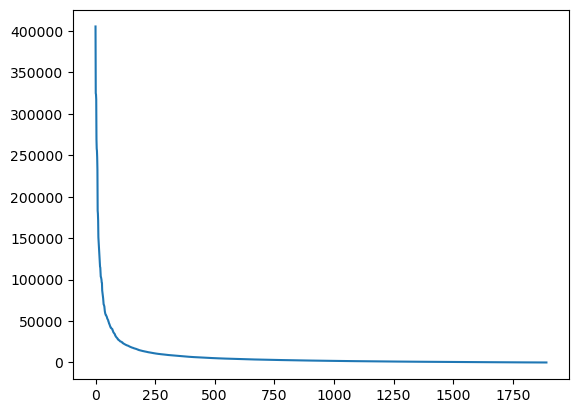

In [28]:
# Graficamos los valores singulares vs la varianza, como podemos apreciar, la variaza cae rápidamente a cero, por lo que con pocos valores singulares
# podremos explicar gran parte de la varianza
x_coordinate = [i for i in range(len(S)) ]
plt.plot(x_coordinate,S)
plt.show()

In [29]:
# Hallamos la varianza explicada en función de los valores singulares, usaremos 55 valores singulares ya que estos explican el 90% de la varianza.
var_explained = np.round(S**2/np.sum(S**2), decimals=6)
sum(var_explained[0:55])

np.float64(0.9064)

In [30]:
# Hallamos las recomendaciones usando 55 valores singulares
n=55
k=55
S2= np.resize(S,[n,1])*np.eye(n,k) #ponemos los valores singulares en una matriz diagonal
l=55
SVDresult = pd.DataFrame(np.dot(U[:,0:l],np.dot(S2[0:l,0:l],Vt[0:l,:]))).round() + m_media.reshape(-1 , 1)

In [31]:
# Arreglamos el vector de recomendaciones agregando el nombre de los indices (artistas)
SVDresult.columns = r_matrix_dummy.columns

# Creamos el vector SVDfila que contiene las recomendaciones para el usario 8
SVDfila = SVDresult.iloc[6] #-> el sexto elemento contiene las recomendaciones del usuario 8, porque la lista original de usuarios inicia desde 2.

# Trasponemos el vector, ordenamos las recomendaciones de mayor a menor y quitamos los artistas que ya escucha el usuario 8
SVDfila = SVDfila.T
SVDfila_sort = SVDfila.sort_values(ascending= False)
SVDfila_sort = SVDfila_sort[~SVDfila_sort.index.isin(user8.index)]

# Mostramos las primeras 10 recomendaciones para el usuario 8
SVDfila_sort.head(10)


name
Ke$ha               305.057566
Leona Lewis         223.057566
Enrique Iglesias    205.057566
Black Eyed Peas     175.057566
Kylie Minogue       173.057566
Mylène Farmer       130.057566
Carrie Underwood    116.057566
Ciara               111.057566
Destiny's Child     105.057566
Michael Jackson      92.057566
Name: 6, dtype: float64

Como se observa en el código, se hallaron las matrices U, S y Vt, a partir de la matriz S de varianza se cálculo la varianza explicada en función de los valores singulares usados, se usaron 55 valores singulares ya que estos explican el 90% de la varianza. Con la matriz S2 calculada procedemos a hallar la matriz X (la de ratings pero con SVD) para poder determinar cuales son las recomendaciones para los usuarios, finalmente, a partir de esta matriz de recomendaciones filtramos las recomendaciones para el usuario 8 y arreglamos los resultados para su presentación.

los artistas recomendados son: Ke$ha, Leona Lewis, Enrique Iglesias, Black Eyed Peas, Kyley Minogue, Mylene Farmer, Carrie Underwood, Ciara, Destiny's Child y Michael Jackson. Notemos que al igual que las recomendaciones del modelo por similitud de coseno, aparecen artistas pop, sin embargo, el orden de algunos artistas canbian respecto al anterior listado, adicionalmente, en este listado hay agrupaciones y artistas masculinos entre los primeros 4 recomendados por lo que hay mayor espectro de caracteristicas en las recomendaciones más relevantes. 

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hier-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [32]:
#Importamos apyori
from apyori import apriori

In [33]:
# Creamos un nuevo df llamado newdf con la lista de usuarios y los artistas que escuchan
newdf = df[['userID', 'name']]

In [34]:
# Convertimos nuestra dataframe en una lista de listas.
artistas_ap = []
for i in newdf['userID'].unique():
    artistas_ap.append(list(newdf[newdf['userID'] == i]['name'].values))

In [35]:
# Observamos los artistas del usuario 8 (indice 6 ya que el listado de usuarios inicia desde 2)
artistas_ap[6]

['Dido',
 'Lady Gaga',
 'Duffy',
 'Whitney Houston',
 'Mariah Carey',
 'Céline Dion',
 'Rihanna',
 'Britney Spears',
 'Kelly Clarkson',
 'Christina Aguilera',
 'Beyoncé',
 'Sugababes',
 'Lily Allen',
 'Katy Perry',
 'P!nk',
 'Natasha Bedingfield',
 'The Saturdays',
 'No Angels',
 'Sandy',
 'Vanessa Petruo',
 'Alexander',
 'Queensberry',
 'Fady Maalouf',
 'Cher',
 'Barbara Schöneberger',
 'Colbie Caillat',
 'Annett Louisan',
 'Taylor Swift',
 'Nadja Benaissa',
 'Lena',
 'Cassandra Steen',
 'Wir sind Helden',
 'The Pussycat Dolls',
 'Monrose',
 'Gabrielle',
 'Cheryl Cole',
 'Milow',
 'Sarah Connor',
 'Jason Mraz',
 'Brad Paisley',
 'Silbermond',
 'Diyana',
 'Maria Mena',
 'Shania Twain',
 'Jennifer Chung',
 'A Fine Frenzy',
 'Lucylicious',
 'Sugarland',
 'Christina Stürmer',
 'Jack Johnson']

In [36]:
# Creamos las reglas de asociación
# Usamos un soporte mínimo de 0.001, es decir, artistas que han sido escuchados por el 0.1% de los usuarios
# Usamos una confianza mínima del 50% de que los usuarios que escucharon el artista B lo hicieron porque escucharon el artista A
# Usamos un lift mínimo de 8, para crear la regla de que la probabilidad de que usuario escuche el artista A y B es más alta a que los escuche por separado
# Usamos una longitud máxima de 2, la idea es asociar los artistas ya escuchados con un par que no esté en la lista.

association_rules = apriori(artistas_ap, min_support=0.001, min_confidence=0.5, min_lift=8,max_length=2)
association_results = list(association_rules)

In [37]:
# Observamos cuantas reglas de asociación se crearon con las condiciones usadas (hiperparámetros)
print("Derivamos {} reglas de asociación.".format(len(association_results)))

Derivamos 33256 reglas de asociación.


In [38]:
# Vamos a asociar los pares según los artistas más escuchados por el usuario 8, recordemos el top 10 de artistas escuchados.
user8.head(10)

,pondrel
name,
No Angels,0.173406
Sandy,0.066044
Britney Spears,0.062240
Vanessa Petruo,0.047824
Beyoncé,0.039279
Alexander,0.038783
Sugababes,0.028639
Queensberry,0.026544
Lady Gaga,0.025387


In [ ]:
# Generamos un dataframe que contenta los valores frozenset del datafram association_result pero en formato string.
apriorirec = pd.DataFrame({'columna': [None] * 33256})
for i in range(0, 33255):
    apriorirec.iloc[i,0] = str(association_results[i][0])

# Extraemos los artistas entre comillas y los apilamos
matches = apriorirec['columna'].str.extractall(r"'([^']+)'")

# Reorganizar las coincidencias en columnas donde la columna 1 tiene el artista A y la columna 2 el artista B
result = matches.unstack()
result.columns = [f'comilla_{i+1}' for i in range(result.shape[1])]

In [151]:
# Buscamos las recomendaciones según artista
resultado = pd.DataFrame()
for i in (range(0,49)):
    nombre = user8.index[i]
    if i == 0:      
        resultado = result[result['comilla_1'] == nombre]['comilla_2']
    else:
        resultado2 = result[result['comilla_1'] == nombre]['comilla_2']
        resultado = pd.concat([resultado, resultado2], ignore_index=True)

resultado.head(10)

0         The Saturdays
1              t.A.T.u.
2                    A1
3          Brick & Lace
4                  Clea
5         Delta Goodrem
6                 Diddy
7        Geri Halliwell
8    Gosia Andrzejewicz
9               Jamelia
Name: comilla_2, dtype: object

Creamos un df que contiene los usuarios y los artistas que escuchan, esta es nuestra selección de la "canasta de productos" por usuario, luego creamos las reglas de asociación usando un soporte de 0.1% dado que la relación entre artistas y usuarios es elevadas, es decir, hay muchos mas artistas (17632) que usuarios (1892);, una confianza del 50% para asegurar que hay asociación entre los pares de artistas y un lift mínimo de 8 para asegurarnos que los artistas son escuchados en conjunto y no separados. Por otro lado, los conjuntos se crearon con longitud máxima de 2, tratamos de usar longitudes mayores pero el coste computacional fue enorme por lo que consideramos aplicar la estrategia de recomendar un nuevo artista por cada artista escuchado. 

Se crearon un total de 33256 asociaciones, esto gracias a que el soporte fue del 0,1%. Finalmente, arreglamos los datos para ser leídos como strings en vez de frozenset y organizamos la lista de recomendaciones. En este caso, la recomedación fue organizada basados en los artistas ya escuchados, por ejemplo, las asociaciones de "No Angels" son las primeras en aparecer ya que "No Angels" es el artista más escuchado por el usuario 8. Es importante señalar que no todos los artistas ya escuchados tienes asociacioes, por ejemplo "Sandy" y "Britney Spears" no tienen asociaciones en este modelo.

Usando la estrategía anteriormente mencionada, las recomendaciones son "The Saturdays", "t.A.T.u", "A1", "Brick & Lace", "Clea", "Delta Goodrem", "Diddy", "Geri Halliweell", "Gosia Andrezejeicz" y "Jamelia"; si bien, la mayoría son artistas Pop, recomendaciones basadas en artistas relevanetes como Britney Spears o Sandy quedan por fuera porque no se crearon asociaciones para esos artistas; comparando con los modelos de SVD y Similitud de Coseno, nos parece que este metodo requiere más coste computacional para ser efectivo (es decir, para encontrar esas asociaciones relevantes), entendemos que para mejorar el algoritmo podríamos ser más rigurosos en la hiperparametrización pero siempre el coste computacional se eleva.

### 4. Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

Los procedimientos que generaron mejores recomendaciones fueron similitud de Coseno seguido de SVD (SVD es bueno pero su desempeño depende de la elección de la cantidad de valores singulares), por otro lado, el modelo que les sigue es el de canasta de preferencia que aunque hace recomendaciones buenas, depende mucho de las asociaciones identificadas haciendo que sea posible que se pierdan recomendaciones basadas en preferencias relevantes (no descartamos que para un ejercicio como el del supermercado y los bienes complementarios su desempeño sea más valioso que el de otros modelos), finalmente los peores modelos son promedio ponderado y aún más promedio simple por que recomiendan más basado en la popularidad de los artistas en general y no en las preferencias del usuario aunque no se descarta que en casos universales como el ejemplo del top de 10 recomendaciones por país de peliculas de Netflix sean modelos más practicos y útiles, adicionalmente que serían buenos modelos de recomendación para nuevos usuarios.

Ahora respecto a la evaluación objetiva, consideramos que puede llevarse una evaluación del sistema de recomendación más objetiva si se lleva a cabo teniendo más información de los artistas, muchos los desconocíamos, y encontramos algunos patrones fáciles como el genero pop y el sexo femenino; pero creo que podrían hacer otros patrones para evaluar como la nacionalidad de los artistas, si eran agrupaciones o solistas, si son clásicos o nuevos, entre otras. Por ejemplo, no hay una forma objetiva de evaluar que recomendación sería mejor entre similitud de coseno y SVD por que ambas recomendaban artistas pop, por lo que evaluar otras caracteristicas permitirían detectar más diferencias y podría permitir evaluar rigurozamente los modelos.